In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# load dataset
demo = pd.read_csv("PData.csv")
feature_cols = ['P']
X = demo[feature_cols] 
y = demo.P_Level

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tree = DecisionTreeClassifier(criterion="entropy")
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [5]:
new_input = [[7.5]]
new_output = tree.predict(new_input)
print(new_input, new_output)

[[7.5]] ['VL']


In [6]:
print(demo.groupby('P_Level').size())

P_Level
H       98
L       91
M      161
MH     173
VH    1010
VL      23
dtype: int64


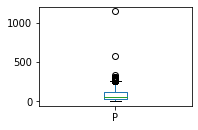

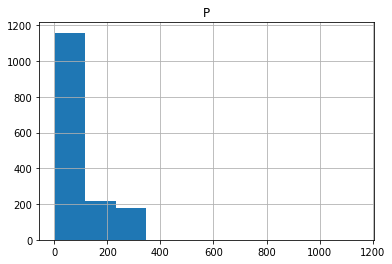

In [7]:
# box and whisker plots
demo.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
demo.hist()
plt.show()


[Text(558.0, 489.24, 'X[0] <= 34.5\nentropy = 1.645\nsamples = 933\nvalue = [58, 53, 94, 100, 615, 13]'),
 Text(465.0, 380.52000000000004, 'X[0] <= 21.5\nentropy = 2.112\nsamples = 318\nvalue = [58, 53, 94, 100, 0, 13]'),
 Text(279.0, 271.8, 'X[0] <= 14.5\nentropy = 1.273\nsamples = 160\nvalue = [0, 53, 94, 0, 0, 13]'),
 Text(186.0, 163.08000000000004, 'X[0] <= 7.5\nentropy = 0.716\nsamples = 66\nvalue = [0, 53, 0, 0, 0, 13]'),
 Text(93.0, 54.360000000000014, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 13]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.0\nsamples = 53\nvalue = [0, 53, 0, 0, 0, 0]'),
 Text(372.0, 163.08000000000004, 'entropy = 0.0\nsamples = 94\nvalue = [0, 0, 94, 0, 0, 0]'),
 Text(651.0, 271.8, 'X[0] <= 28.5\nentropy = 0.948\nsamples = 158\nvalue = [58, 0, 0, 100, 0, 0]'),
 Text(558.0, 163.08000000000004, 'entropy = 0.0\nsamples = 100\nvalue = [0, 0, 0, 100, 0, 0]'),
 Text(744.0, 163.08000000000004, 'entropy = 0.0\nsamples = 58\nvalue = [58, 0, 0, 0, 0, 0]'

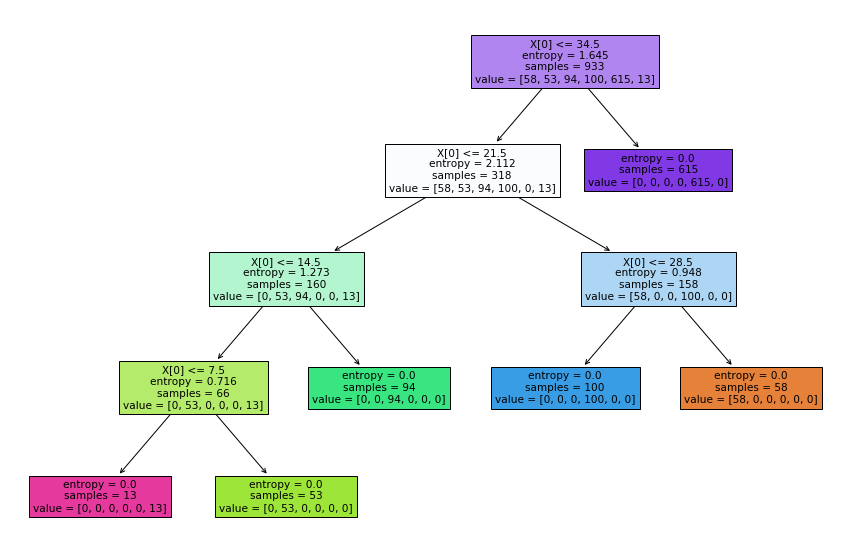

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
data = pd.read_csv("PData.csv")
feature_cols = ['P']
X = data[feature_cols] 
y = data.P_Level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(tr,filled=True)

In [11]:
print(tree.export_text(tr))

|--- feature_0 <= 34.50
|   |--- feature_0 <= 21.50
|   |   |--- feature_0 <= 14.50
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- class: VL
|   |   |   |--- feature_0 >  7.50
|   |   |   |   |--- class: L
|   |   |--- feature_0 >  14.50
|   |   |   |--- class: M
|   |--- feature_0 >  21.50
|   |   |--- feature_0 <= 28.50
|   |   |   |--- class: MH
|   |   |--- feature_0 >  28.50
|   |   |   |--- class: H
|--- feature_0 >  34.50
|   |--- class: VH



In [12]:
import pickle
pickle.dump(tr, open('Ppredict.pkl', 'wb'))